## IMPORTING NECESSARY LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

UPLOADING DATA FROM INTERNATL STORAGE

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving candy-data.csv to candy-data.csv
User uploaded file "candy-data.csv" with length 5193 bytes


CONNECTING DATAS

In [3]:
df = pd.read_csv(io.StringIO(uploaded['candy-data.csv'].decode('utf-8')))
df = df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent','chocolate']]

df.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0


TRAINING DATA

In [4]:
from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.2)

In [5]:
train_df = trainingSet
test_df = testSet

In [6]:
X_train = train_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']]

y_train = train_df["chocolate"]

X_test = test_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']]

y_test = test_df["chocolate"]


In [7]:

y_test.head()

,chocolate
36,1
69,0
9,0
3,0
1,1


DATALARNI KORIB CHIQAMIZ ( DATA EXPLORATION)

In [10]:
y_train.value_counts()

,count
chocolate,
0,40
1,28


<ipython-input-12-df01b5f04ac8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="chocolate", data=train_df, palette='Blues_d')


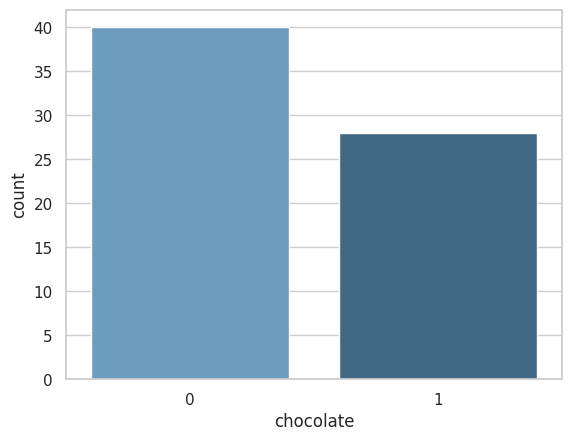

<Figure size 640x480 with 0 Axes>

In [12]:
sns.countplot(x="chocolate", data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

In [13]:
count_no_choc = len(train_df[train_df['chocolate']==0])
count_choc = len(train_df[train_df['chocolate']==1])
pct_of_no_choc = count_no_choc/(count_no_choc+count_choc)
print("CHOCOLAT EMASLAR FOIZI", pct_of_no_choc*100)
pct_of_choc = count_choc/(count_no_choc+count_choc)
print("CHOCOLATLAR FOIZI", pct_of_choc*100)


CHOCOLAT EMASLAR FOIZI 58.82352941176471
CHOCOLATLAR FOIZI 41.17647058823529


In [14]:
train_df.groupby('chocolate').mean()
train_df.groupby('caramel').mean()

,fruity,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
caramel,,,,,,,,,,,
0,0.54386,0.175439,0.017544,0.052632,0.210526,0.157895,0.614035,0.450649,0.430561,48.975695,0.350877
1,0.00000,0.272727,0.272727,0.272727,0.090909,0.545455,0.272727,0.590455,0.636909,57.353285,0.727273


PREDICTIONS

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

EVALUATING MODEL WITH CONFUSION MATRIX


In [16]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[7, 1],
       [1, 8]])

visualising

Text(0.5, 427.9555555555555, 'Predicted label')

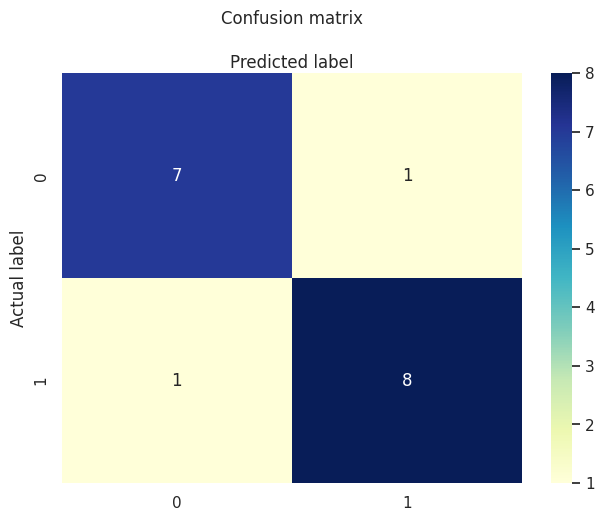

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ACCURENCY,RECALL AND PRECISION

In [18]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8823529411764706
Precision: 0.8888888888888888
Recall: 0.8888888888888888


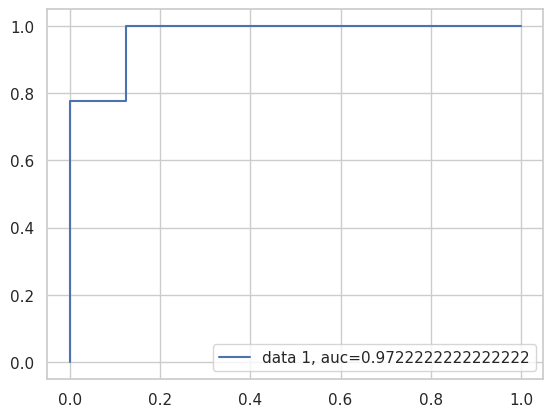

In [19]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()